In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Aastha\Downloads\drug200.csv")

In [3]:
#Business Problem: Design a model that predicts what type of drug should be recommended to patient based on 
#Some features that are present in the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#First we will perform the EDA and look for relationship between Label (Drug) and other indepent feautures
#Univariate Analysis
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
CatF=['Sex','BP','Cholesterol']
ConF=['Age','Na_to_K']

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


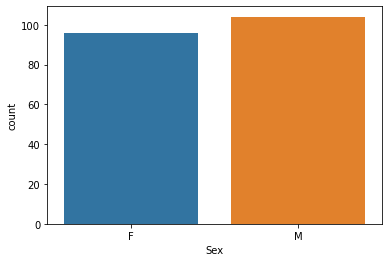

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


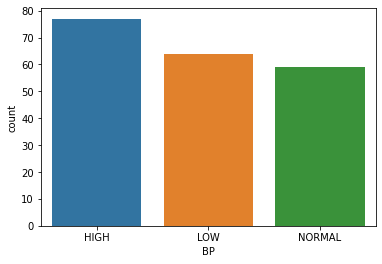

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


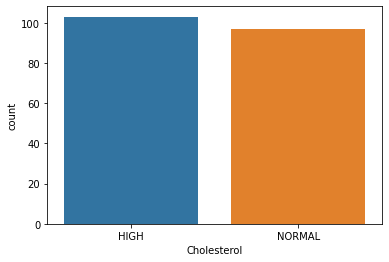

In [7]:
for i in CatF:
    sns.countplot(df[i])
    plt.show()

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


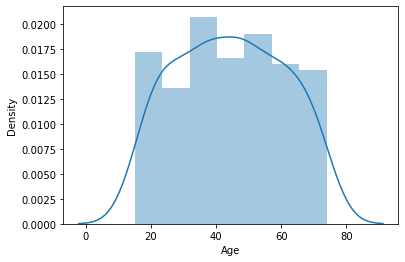

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


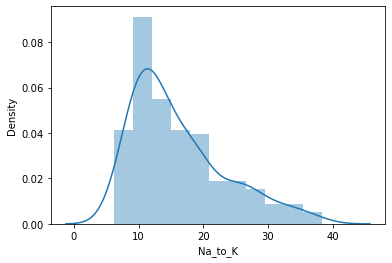

In [9]:
for i in ConF:
    sns.distplot(df[i])
    plt.show()

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


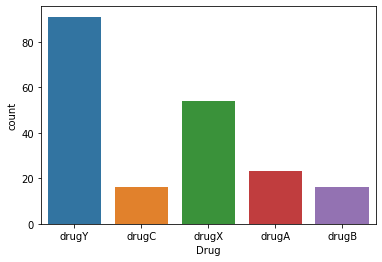

In [10]:
sns.countplot(df['Drug'])
plt.show()

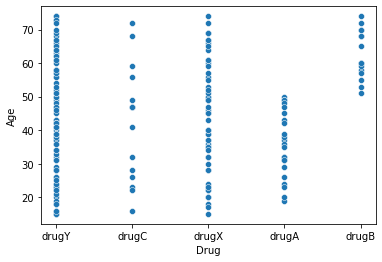

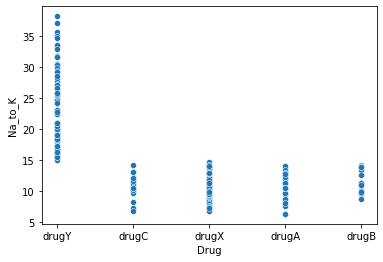

In [12]:
for i in ConF:
    sns.scatterplot(x='Drug',y=i,data=df)
    plt.show()

In [14]:
#Bivariate Analysis
#Categorical with Categorical
pd.crosstab(df['Sex'],df['Drug'],margins=True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Sex,,,,,,
F,9,6,7,27,47,96
M,14,10,9,27,44,104
All,23,16,16,54,91,200


In [15]:
pd.crosstab(df['BP'],df['Drug'],margins=True)

Drug,drugA,drugB,drugC,drugX,drugY,All
BP,,,,,,
HIGH,23,16,0,0,38,77
LOW,0,0,16,18,30,64
NORMAL,0,0,0,36,23,59
All,23,16,16,54,91,200


In [21]:
pd.crosstab(df['Cholesterol'],df['Drug'],margins=True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Cholesterol,,,,,,
HIGH,12,8,16,20,47,103
NORMAL,11,8,0,34,44,97
All,23,16,16,54,91,200


C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


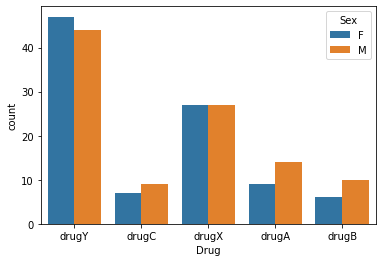

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


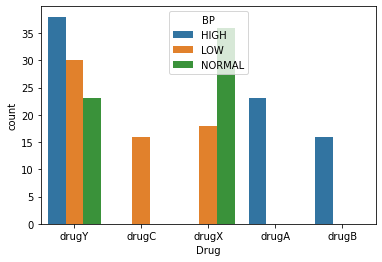

C:\Users\Aastha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


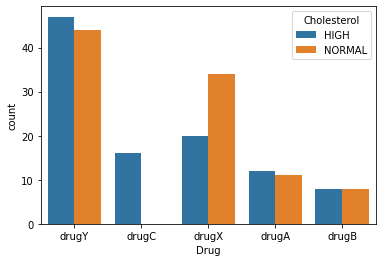

In [22]:
for i in CatF:
    sns.countplot('Drug',hue=i,data=df)
    plt.show()

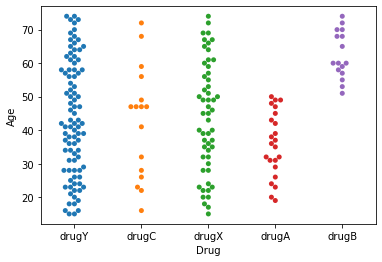

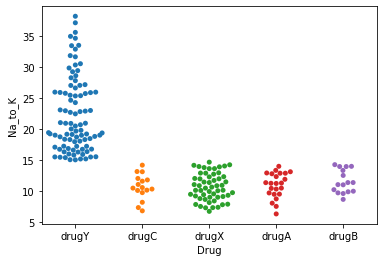

In [23]:
#Bivariate Analysis between continous features and categorical label
for i in ConF:
    sns.swarmplot(x='Drug',y=i,data=df)
    plt.show()

In [39]:
#Making Model Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=df.drop('Drug',axis=1)
y=df['Drug']

In [41]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [34]:
#Encoding Data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
l1=LabelEncoder()
df['Drug']=l1.fit_transform(df['Drug'])

In [38]:
df['Drug'].value_counts()

4    91
3    54
0    23
1    16
2    16
Name: Drug, dtype: int64

In [52]:
xnew.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [31]:
dt=DecisionTreeClassifier(criterion='entropy')

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(xnew,y,train_size=0.8)

In [55]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [56]:
ypred=dt.predict(xtest)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
confusion_matrix(ytest,ypred)

array([[ 1,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 20]], dtype=int64)

In [62]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        20

    accuracy                           0.97        40
   macro avg       0.96      0.90      0.91        40
weighted avg       0.98      0.97      0.97        40



In [66]:
x1=[[25,15,0,1,0,0,1,1,0]]

In [67]:
y1=dt.predict(x1)

In [71]:
y1=pd.DataFrame(y1)

In [74]:
l1.inverse_transform(y1)

C:\Users\Aastha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['drugY'], dtype=object)

In [75]:
#Our Model is 97% Accurate, so we have built a good model

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
r1=RandomForestClassifier(n_estimators=5)

In [79]:
r1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=5)

In [80]:
yrpred=r1.predict(xtest)

In [81]:
print(confusion_matrix(yrpred,ytest))

[[ 1  1  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 20]]


In [82]:
print(classification_report(yrpred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        20

    accuracy                           0.97        40
   macro avg       0.96      0.90      0.91        40
weighted avg       0.98      0.97      0.97        40



In [83]:
#We get same accuracy from both of the techniques
#We implemenented Random forest as a technique of bagging that is multiple Decision tree algorithms in our case 5 
#working in parallel to produce the final output and based on the maximum votes output is generated